#### Import required packagesm

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the data

In [2]:
df = pd.read_csv("./data.csv")

In [11]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [13]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


# Question 1

In [82]:
sum(df['order_amount'])/len(df)

3145.128

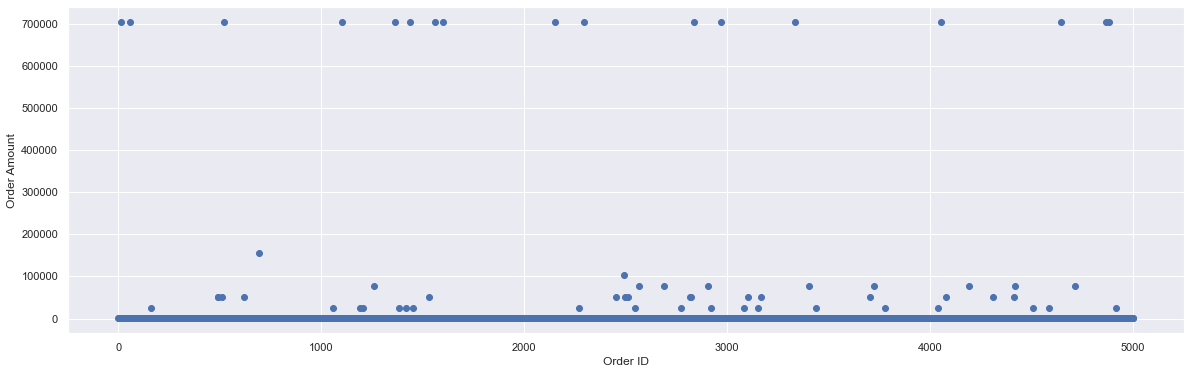

In [84]:
plt.scatter(df['order_id'], df['order_amount'])
plt.xlabel('Order ID')
plt.ylabel('Order Amount')
plt.savefig('./plots/AmountvID.png')

In [49]:
df1 = df[df['total_items'] < 50]

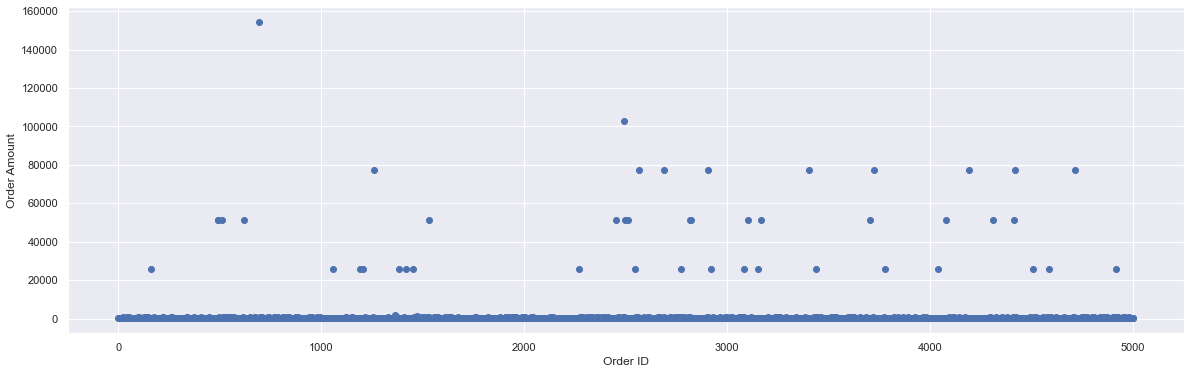

In [83]:
plt.scatter(df1['order_id'], df1['order_amount'])
plt.xlabel('Order ID')
plt.ylabel('Order Amount')
plt.savefig('./plots/AmountvID2.png')

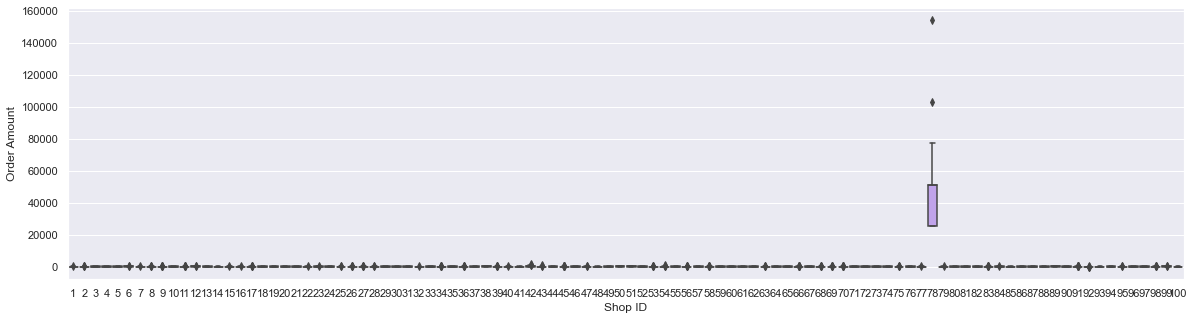

In [92]:
plt.subplots(figsize=(20, 5))
sns.boxplot(x = df1['shop_id'], y = df1['order_amount'], data = df1).set(xlabel = 'Shop ID', ylabel = 'Order Amount')
plt.savefig('./plots/AmountvShop.png')

### Generating Relative Frequency Distribution

In [55]:
rel_freq = {}
total_points = len(df)
for index, row in df.iterrows():
    avg_item_value = row['order_amount']/row['total_items']
    if avg_item_value in rel_freq:
        rel_freq[avg_item_value] += (1/total_points)
    else:
        rel_freq[avg_item_value] = (1/total_points)
max_freq = max(rel_freq.values())
rel_freq.update((x, y/max_freq) for x, y in rel_freq.items())

### Weighted AOV

In [77]:
def wAOV(data, rf):
    x = 0
    for idx, row in data.iterrows():
        x += ((row['order_amount']) * rf[(row['order_amount']/row['total_items'])])
    return x/len(data)

wAOV(df1, rel_freq)

218.28560229781272

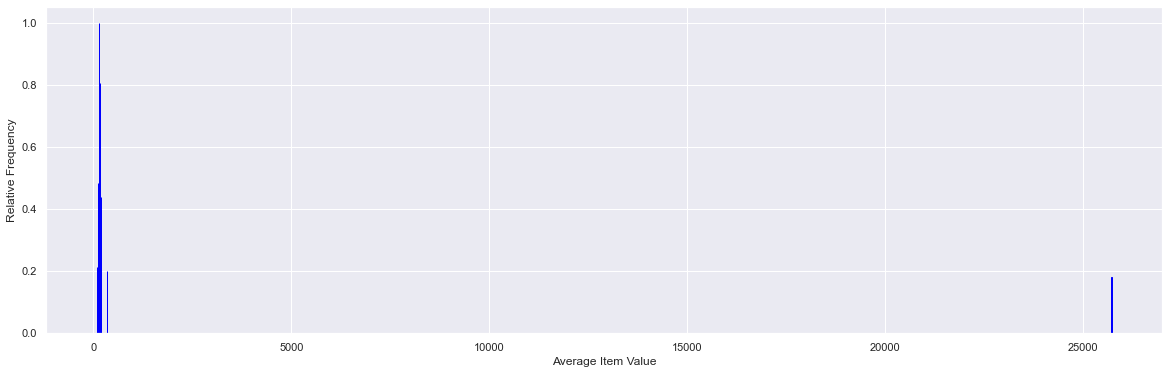

In [93]:
plt.rcParams["figure.figsize"] = (20,6)
# plotting the points
plt.bar(*zip(*sorted(rel_freq.items())),width = 0.8,edgecolor='blue')

# naming the x axis
plt.xlabel('Average Item Value')
# naming the y axis
plt.ylabel('Relative Frequency')
  
plt.savefig('./plots/RelFreq.png')



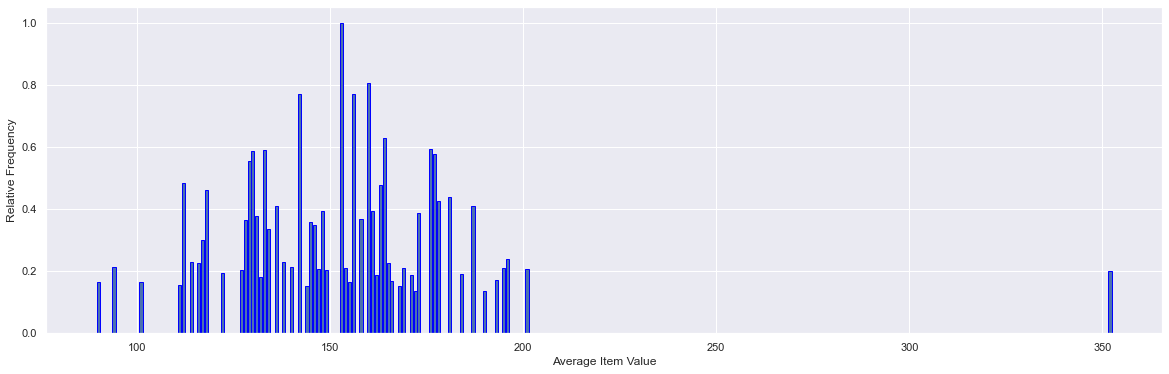

In [94]:
# plotting the points
items = sorted(rel_freq.items())[:-1]
plt.bar(*zip(*items),width = 0.8,edgecolor='blue')

# naming the x axis
plt.xlabel('Average Item Value')
# naming the y axis
plt.ylabel('Relative Frequency')
  
# function to show the plot
plt.savefig('./plots/ZoomRelFreq.png')